## Importing libraries

In [116]:
import pandas as pd
import numpy as np
import nltk


In [117]:
import random

## Load the data

Loading the jobs dataset

In [118]:
df = pd.read_csv("C:/Users/Srushti/Desktop/capstone/Combined_Jobs_Final.csv")
random.seed(2)
df_jobs = df.sample(n=1000)
df_jobs.head()

,Job.ID,Provider,Status,Slug,Title,Position,Company,City,State.Name,State.Code,...,Industry,Job.Description,Requirements,Salary,Listing.Start,Listing.End,Employment.Type,Education.Required,Created.At,Updated.At
18042,247569,2,open,arlington-va-life-line-community-healthcare-nu...,Nurse Practitioner - DC @ Life Line Community ...,Nurse Practitioner - DC,Life Line Community Healthcare,Arlington,Virginia,VA,...,NaN,New career opportunities for Nurse Practitione...,NaN,NaN,24-02-2015,23-03-2015,Full-Time/Part-Time,Master's Degree,2015-02-25 10:09:45 UTC,2015-02-25 10:09:45 UTC
39757,269294,2,open,novato-ca-officeteam-sales-assistant,Sales Assistant @ OfficeTeam,Sales Assistant,OfficeTeam,Novato,California,CA,...,NaN,Ref ID: 00590-109799Classification: Secretary/...,NaN,NaN,09-03-2015,08-04-2015,Seasonal/Temp,Not Specified,2015-03-12 10:49:01 UTC,2015-03-12 10:49:01 UTC
62536,292417,2,open,moorhead-mn-the-alzheimer-s-association-of-mn-...,Rural Provider Outreach Consultant @ The Alzhe...,Rural Provider Outreach Consultant,The Alzheimer's Association of MN/ND,Moorhead,Minnesota,MN,...,NaN,\r\nThe Alzheimer&rsquo;s Association&rsquo;s ...,NaN,NaN,27-03-2015,26-04-2015,Part-Time,Bachelor's Degree,2015-03-28 10:15:18 UTC,2015-03-28 10:15:18 UTC
18210,247737,2,open,farmington-mi-confidential-part-time-legal-sec...,Part Time Legal Secretary @ Confidential,Part Time Legal Secretary,Confidential,Farmington,Michigan,MI,...,NaN,Boutique S.E. Oakland County law firm seeks pa...,NaN,NaN,24-02-2015,23-03-2015,Part-Time,Not Specified,2015-02-25 10:12:21 UTC,2015-02-25 10:12:21 UTC
42624,272164,2,open,new-york-ny-accountemps-accountant-entry-level...,Accountant - Entry Level @ Accountemps,Accountant - Entry Level,Accountemps,New York,New York,NY,...,NaN,Ref ID:02942-112953Classification:Accounting -...,NaN,NaN,13-03-2015,12-04-2015,Seasonal/Temp,Not Specified,2015-03-14 10:02:40 UTC,2015-03-14 10:02:40 UTC


In [119]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 18042 to 37628
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job.ID              1000 non-null   int64  
 1   Provider            1000 non-null   int64  
 2   Status              1000 non-null   object 
 3   Slug                1000 non-null   object 
 4   Title               1000 non-null   object 
 5   Position            1000 non-null   object 
 6   Company             970 non-null    object 
 7   City                996 non-null    object 
 8   State.Name          995 non-null    object 
 9   State.Code          995 non-null    object 
 10  Address             0 non-null      object 
 11  Latitude            1000 non-null   float64
 12  Longitude           1000 non-null   float64
 13  Industry            1 non-null      object 
 14  Job.Description     999 non-null    object 
 15  Requirements        0 non-null      float64
 16  S

## Exploratory Data Analysis

#### First check the NA's

In [120]:
df_jobs.isnull().sum()

Job.ID                   0
Provider                 0
Status                   0
Slug                     0
Title                    0
Position                 0
Company                 30
City                     4
State.Name               5
State.Code               5
Address               1000
Latitude                 0
Longitude                0
Industry               999
Job.Description          1
Requirements          1000
Salary                 999
Listing.Start            6
Listing.End              1
Employment.Type          0
Education.Required       1
Created.At               0
Updated.At               0
dtype: int64

 From the above list we see that there are lot of NaN values, perform data clean
 ing for each and every column

#### Selecting the columns for the jobs corpus


For this example we only consider the columns: 'Job.ID', 'Title', 'Position', 'Company','City', 'Empl_type','Edu_req','Job_Description'

In [121]:

cols = ['Job.ID']+['Title']+['Position']+ ['Company']+['City']+['Employment.Type']+['Job.Description']
df_jobs =df_jobs[cols]
df_jobs.columns = ['Job.ID', 'Title', 'Position', 'Company','City', 'Empl_type','Job_Description']
df_jobs.head()

,Job.ID,Title,Position,Company,City,Empl_type,Job_Description
18042,247569,Nurse Practitioner - DC @ Life Line Community ...,Nurse Practitioner - DC,Life Line Community Healthcare,Arlington,Full-Time/Part-Time,New career opportunities for Nurse Practitione...
39757,269294,Sales Assistant @ OfficeTeam,Sales Assistant,OfficeTeam,Novato,Seasonal/Temp,Ref ID: 00590-109799Classification: Secretary/...
62536,292417,Rural Provider Outreach Consultant @ The Alzhe...,Rural Provider Outreach Consultant,The Alzheimer's Association of MN/ND,Moorhead,Part-Time,\r\nThe Alzheimer&rsquo;s Association&rsquo;s ...
18210,247737,Part Time Legal Secretary @ Confidential,Part Time Legal Secretary,Confidential,Farmington,Part-Time,Boutique S.E. Oakland County law firm seeks pa...
42624,272164,Accountant - Entry Level @ Accountemps,Accountant - Entry Level,Accountemps,New York,Seasonal/Temp,Ref ID:02942-112953Classification:Accounting -...


In [122]:
# checking for the null values again.
df_jobs.isnull().sum()

Job.ID              0
Title               0
Position            0
Company            30
City                4
Empl_type           0
Job_Description     1
dtype: int64

#### Let´s check the NA's by plotting them

selecting NaN rows of city

In [123]:

df_nan_city = df_jobs[pd.isnull(df_jobs['City'])]
print(df_nan_city.shape)
df_nan_city.head()

(4, 7)


,Job.ID,Title,Position,Company,City,Empl_type,Job_Description
26299,255830,Account Executive @ CHI Payment Systems,Account Executive,CHI Payment Systems,NaN,Full-Time/Part-Time,"If you&rsquo;re energetic, motivated, hardwork..."
3441,142062,Marketing Manager @ CHI Payment Systems,Marketing Manager,CHI Payment Systems,NaN,Full-Time/Part-Time,"If you&rsquo;re energetic, motivated, hardwork..."
62840,293566,Account Executive @ CHI Payment Systems,Account Executive,CHI Payment Systems,NaN,Full-Time/Part-Time,"CHI Payment Systems, a leading merchant servic..."
62833,293559,New Business Sales Representative @ CHI Paymen...,New Business Sales Representative,CHI Payment Systems,NaN,Full-Time/Part-Time,"CHI Payment Systems, a leading merchant servic..."


In [124]:
df_nan_city.groupby(['Company'])['City'].count()

Company
CHI Payment Systems    0
Name: City, dtype: int64

#### We see that there are only 9 companies cities that are having NaN values so it must be manually adding their head quarters (by simply searching at google)


In [125]:
#replacing nan with thier headquarters location
df_jobs['Company'] = df_jobs['Company'].replace(['Genesis Health Systems'], 'Genesis Health System')
df_jobs.loc[df_jobs.Company == 'CHI Payment Systems', 'City'] = 'Illinois'
df_jobs.loc[df_jobs.Company == 'Academic Year In America', 'City'] = 'Stamford'
df_jobs.loc[df_jobs.Company == 'CBS Healthcare Services and Staffing ', 'City'] = 'Urbandale'
df_jobs.loc[df_jobs.Company == 'Driveline Retail', 'City'] = 'Coppell'
df_jobs.loc[df_jobs.Company == 'Educational Testing Services', 'City'] = 'New Jersey'
df_jobs.loc[df_jobs.Company == 'Genesis Health System', 'City'] = 'Davennport'
df_jobs.loc[df_jobs.Company == 'Home Instead Senior Care', 'City'] = 'Nebraska'
df_jobs.loc[df_jobs.Company == 'St. Francis Hospital', 'City'] = 'New York'
df_jobs.loc[df_jobs.Company == 'Volvo Group', 'City'] = 'Washington'
df_jobs.loc[df_jobs.Company == 'CBS Healthcare Services and Staffing', 'City'] = 'Urbandale'

In [126]:
df_jobs.isnull().sum()

Job.ID              0
Title               0
Position            0
Company            30
City                0
Empl_type           0
Job_Description     1
dtype: int64

In [127]:
#The employement type NA are from Uber so I assume as part-time and full time
df_nan_emp = df_jobs[pd.isnull(df_jobs['Empl_type'])]
df_nan_emp.head()


,Job.ID,Title,Position,Company,City,Empl_type,Job_Description


In [128]:
df_jobs['Empl_type'].unique()

array(['Full-Time/Part-Time', 'Seasonal/Temp', 'Part-Time', 'Per Diem',
       'Intern'], dtype=object)

In [129]:
#replacing na values with part time/full time
df_jobs['Empl_type']=df_jobs['Empl_type'].fillna('Full-Time/Part-Time')
df_jobs.groupby(['Empl_type'])['Company'].count()
df_jobs.head()

,Job.ID,Title,Position,Company,City,Empl_type,Job_Description
18042,247569,Nurse Practitioner - DC @ Life Line Community ...,Nurse Practitioner - DC,Life Line Community Healthcare,Arlington,Full-Time/Part-Time,New career opportunities for Nurse Practitione...
39757,269294,Sales Assistant @ OfficeTeam,Sales Assistant,OfficeTeam,Novato,Seasonal/Temp,Ref ID: 00590-109799Classification: Secretary/...
62536,292417,Rural Provider Outreach Consultant @ The Alzhe...,Rural Provider Outreach Consultant,The Alzheimer's Association of MN/ND,Moorhead,Part-Time,\r\nThe Alzheimer&rsquo;s Association&rsquo;s ...
18210,247737,Part Time Legal Secretary @ Confidential,Part Time Legal Secretary,Confidential,Farmington,Part-Time,Boutique S.E. Oakland County law firm seeks pa...
42624,272164,Accountant - Entry Level @ Accountemps,Accountant - Entry Level,Accountemps,New York,Seasonal/Temp,Ref ID:02942-112953Classification:Accounting -...


##  Creating the jobs corpus

#### combining the columns of position, company, city, emp_type and position

In [130]:
df_jobs["text"] = df_jobs["Position"].map(str) + " " + df_jobs["Company"] +" "+ df_jobs["City"]+ " "+df_jobs['Empl_type']+" "+df_jobs['Job_Description'] +" "+df_jobs['Title']
df_jobs.head(2)

,Job.ID,Title,Position,Company,City,Empl_type,Job_Description,text
18042,247569,Nurse Practitioner - DC @ Life Line Community ...,Nurse Practitioner - DC,Life Line Community Healthcare,Arlington,Full-Time/Part-Time,New career opportunities for Nurse Practitione...,Nurse Practitioner - DC Life Line Community He...
39757,269294,Sales Assistant @ OfficeTeam,Sales Assistant,OfficeTeam,Novato,Seasonal/Temp,Ref ID: 00590-109799Classification: Secretary/...,Sales Assistant OfficeTeam Novato Seasonal/Tem...


In [131]:
df_all = df_jobs[['Job.ID', 'text', 'Title']]

df_all = df_all.fillna(" ")

df_all.head()

,Job.ID,text,Title
18042,247569,Nurse Practitioner - DC Life Line Community He...,Nurse Practitioner - DC @ Life Line Community ...
39757,269294,Sales Assistant OfficeTeam Novato Seasonal/Tem...,Sales Assistant @ OfficeTeam
62536,292417,Rural Provider Outreach Consultant The Alzheim...,Rural Provider Outreach Consultant @ The Alzhe...
18210,247737,Part Time Legal Secretary Confidential Farming...,Part Time Legal Secretary @ Confidential
42624,272164,Accountant - Entry Level Accountemps New York ...,Accountant - Entry Level @ Accountemps


In [132]:
df_all.shape

(1000, 3)

In [133]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Srushti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Srushti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Srushti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Srushti\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [134]:

from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2

def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",text)
  text=re.sub("(\\d|\\W)+"," ",text)
  text = text.replace("nbsp", "")
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
  clean_text2 = [word for word in clean_text if black_txt(word)]
  return " ".join(clean_text2)


#### Cleaning the jobs corpus

In [135]:
df_all['text'] = df_all['text'].apply(clean_txt)

#### Finally we ended we a clean text for the jobs dataset:

In [136]:
df_all.head()

,Job.ID,text,Title
18042,247569,nurse practitioner life line community healthc...,Nurse Practitioner - DC @ Life Line Community ...
39757,269294,sales assistant officeteam novato seasonal tem...,Sales Assistant @ OfficeTeam
62536,292417,rural provider outreach consultant alzheimers ...,Rural Provider Outreach Consultant @ The Alzhe...
18210,247737,part time legal secretary confidential farming...,Part Time Legal Secretary @ Confidential
42624,272164,accountant entry level accountemps new york se...,Accountant - Entry Level @ Accountemps


####TF-IDF ( Term Frequency - Inverse Document Frequency )


In [137]:

#initializing tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_jobid = tfidf_vectorizer.fit_transform((df_all['text'])) #fitting and transforming the vector
tfidf_jobid = tfidf_jobid.toarray()

In [221]:

new_tfidf_jobid = []
for jobdesc in tfidf_jobid:
  new_tfidf_jobid.append([np.max(jobdesc)])
new_tfidf_jobid =np.array(new_tfidf_jobid)

new_tfidf_jobid_noli = []
for jobdesc in tfidf_jobid:
  new_tfidf_jobid_noli.append(np.max(jobdesc))
new_tfidf_jobid_noli = np.array(new_tfidf_jobid_noli)
# print(new_tfidf_jobid_noli)


In [222]:
count = 0
for instance in new_tfidf_jobid:
    
    if instance[0]>0.02:
        print(instance)
    else:
        count+=1
# print(set(custom_tgt))
print(count)

[0.28694085]
[0.29451035]
[0.4228511]
[0.56021888]
[0.54842003]
[0.5848617]
[0.51549614]
[0.54326922]
[0.50567173]
[0.31506244]
[0.52643233]
[0.57481589]
[0.47653558]
[0.37474743]
[0.5382195]
[0.37564938]
[0.30551851]
[0.22864916]
[0.35371958]
[0.45024528]
[0.49717426]
[0.52426451]
[0.62768377]
[0.56675886]
[0.35633496]
[0.30816143]
[0.36237854]
[0.36988054]
[0.35435691]
[0.44985569]
[0.36426876]
[0.52888324]
[0.52317661]
[0.41255481]
[0.50528179]
[0.35199444]
[0.414708]
[0.49202417]
[0.67407326]
[0.58119039]
[0.43488379]
[0.78419464]
[0.62886594]
[0.56428483]
[0.5574007]
[0.46768055]
[0.50722649]
[0.45511085]
[0.53850624]
[0.46126591]
[0.60108386]
[0.51774393]
[0.59102237]
[0.56279011]
[0.47749235]
[0.51987828]
[0.54718093]
[0.58125793]
[0.41255481]
[0.42777062]
[0.36479742]
[0.28099665]
[0.43011289]
[0.56665861]
[0.27817873]
[0.39757276]
[0.52013393]
[0.19958104]
[0.5738175]
[0.4232286]
[0.29919845]
[0.42442732]
[0.32573428]
[0.29202822]
[0.44244972]
[0.63206196]
[0.35371958]
[0.3210

In [179]:
# from sklearn.cluster import KMeans
# true_k = 5
# km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100)
# # t0 = time()
# km.fit(tfidf_jobid)


# centroids = km.cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order
# # centroids = km.cluster_centers_
# terms = tfidf_vectorizer.get_feature_names_out()
# for i in range(true_k):
#     print("Cluster %d:" % i, end='')
#     for ind in centroids[i, :10]:
#         print(' %s' % terms[ind], end='')
    # print()

In [224]:
from sklearn.cluster import KMeans
true_k = 3
kmea = KMeans(n_clusters=true_k)
# t0 = time()
kmea.fit(new_tfidf_jobid)


centroids = kmea.cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order

# Get cluster assignments for each data point
cluster_labels = kmea.labels_

# Get cluster centers
cluster_centers = kmea.cluster_centers_

print("Cluster Assignments:", cluster_labels)



# centroids = km.cluster_centers_
# terms = tfidf_vectorizer.get_feature_names_out()
# for i in range(true_k):
#     print("Cluster %d:" % i, end='')
#     for ind in centroids[i, :10]:
#         print(' %s' % terms[ind], end='')
#     print()

Cluster Assignments: [0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 2 1 0 1 0
 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0
 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 2 0 0 1 1 0 1 1 1 0 1 1 1
 0 2 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1
 0 0 1 0 1 0 0 1 1 2 2 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 2 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 2 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 2 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 2 0 1
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0
 1 0 1 1 1 1 1 2 1 0 1 0 1 0 1 0 0 0 0 2 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0
 0 0

c:\Users\Srushti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'K Means without optimization')

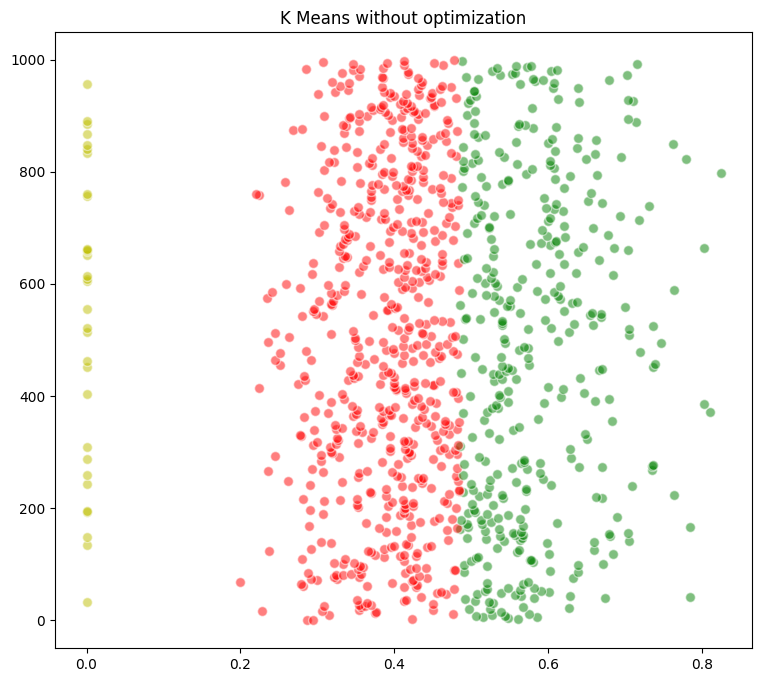

In [246]:
colors = ['r', 'g', 'y']
plt.figure(figsize=(9,8))
count = 0
for instance, tg in zip(new_tfidf_jobid, kmea.labels_):
    plt.scatter(instance[0], count, edgecolor='w', s=50,alpha=0.5, color=colors[tg])
    count+=1
plt.title('K Means without optimization')

In [225]:
print(kmea.inertia_)
# print(km.inertia_)
print("Cluster Centers:", cluster_centers)

4.186183200477586
Cluster Centers: [[3.89053555e-01]
 [5.82217557e-01]
 [5.55111512e-17]]


In [142]:
# true_k = 6
# model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
# model.fit(tfidf_jobid)
# labels=model.labels_
# print(labels)
# wiki_cl=pd.DataFrame(list(zip(df_all['text'],labels)),columns=['title','cluster'])
# print(wiki_cl.sort_values(by=['cluster']))

In [143]:
# print(type(centroids))
# print(len(centroids))
# print(centroids[0])
# print(len(centroids[1]))
# print(centroids[1])
# print(centroids[2])

In [249]:
import numpy
import matplotlib.pyplot as plt

from matplotlib.style import use
from metaheuristics.algorithm.abc import ABC
from metaheuristics.optimization.objection_function_ import QuantizationError
from metaheuristics.optimization.objection_function_ import SumOfSquaredErrors

In [250]:
def decode_centroids(centroids, n_clusters, data):
    return centroids.reshape(n_clusters, 1)
cents = kmea.cluster_centers_
print(cents)

[[3.89053555e-01]
 [5.82217557e-01]
 [5.55111512e-17]]


In [251]:
print(len(new_tfidf_jobid))

1000


Text(0.5, 1.0, 'Original Data')

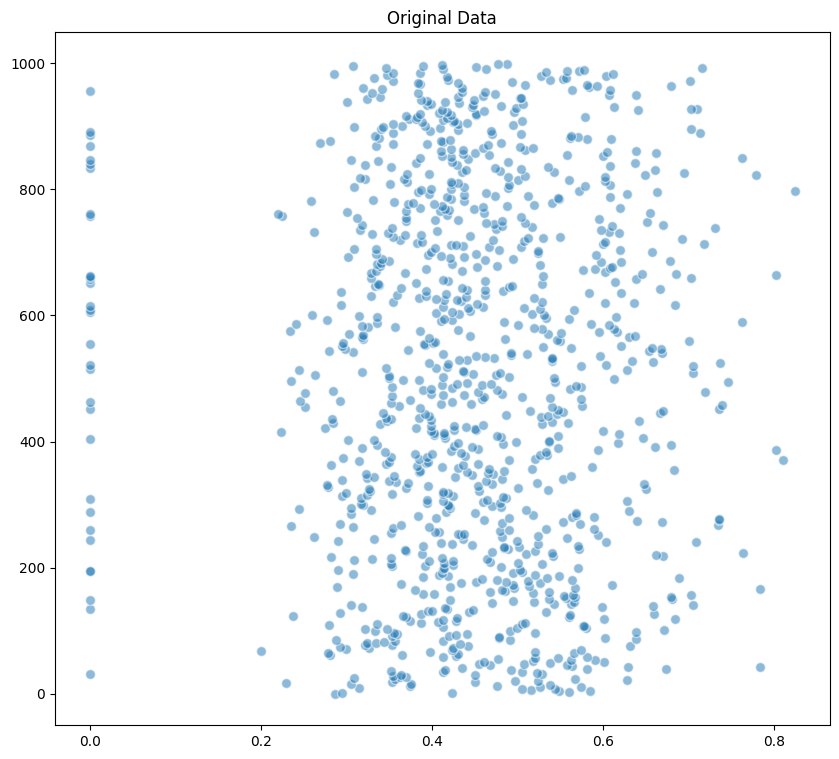

In [252]:
plt.figure(figsize=(10, 9))
plt.scatter(new_tfidf_jobid[:,0], range(1000), s=50, edgecolor='w', alpha=0.5)
plt.title('Original Data')

In [253]:
objective_function = SumOfSquaredErrors(dim=3, n_clusters=3, data=new_tfidf_jobid)
optimizer = ABC(obj_function=objective_function, colony_size=30, n_iter=300, max_trials=100)
optimizer.optimize()

x is: [0.28884281 0.6640922  0.89585395]
<class 'numpy.ndarray'>
x is: [0.91022893 0.04700475 0.22293723]
<class 'numpy.ndarray'>
x is: [0.74322259 0.36271003 0.16496894]
<class 'numpy.ndarray'>
x is: [0.71215419 0.9294549  0.17387751]
<class 'numpy.ndarray'>
x is: [0.8657623  0.46284613 0.50771099]
<class 'numpy.ndarray'>
x is: [0.57683111 0.57092543 0.48650161]
<class 'numpy.ndarray'>
x is: [0.07856924 0.9085445  0.46926598]
<class 'numpy.ndarray'>
x is: [0.3063794  0.36681333 0.06066206]
<class 'numpy.ndarray'>
x is: [0.33982175 0.89591224 0.82299953]
<class 'numpy.ndarray'>
x is: [0.2576501  0.67390198 0.58994169]
<class 'numpy.ndarray'>
x is: [0.40994227 0.86602551 0.76343391]
<class 'numpy.ndarray'>
x is: [0.11152508 0.54780736 0.70249538]
<class 'numpy.ndarray'>
x is: [0.32791079 0.98004586 0.39918514]
<class 'numpy.ndarray'>
x is: [0.56177235 0.23515813 0.31779688]
<class 'numpy.ndarray'>
x is: [0.6800382  0.58509896 0.58339629]
<class 'numpy.ndarray'>
x is: [0.44320564 0.17199

In [254]:
centroids = dict(enumerate(decode_centroids(optimizer.optimal_solution.pos, n_clusters=3, data=new_tfidf_jobid)))
print(centroids)

{0: array([0.43456222]), 1: array([0.30653669]), 2: array([0.66890304])}


In [255]:
# print(new_tfidf_jobid)
# count = 0
# for instance in new_tfidf_jobid:
    
#     if instance[0]>0.02:
#         print(instance)
#     else:
#         count+=1
# # print(set(custom_tgt))
# print(count)

In [256]:
def assign_centroid(centroids, point):
    distances = [np.linalg.norm(point - centroids[idx]) for idx in centroids]
    return np.argmin(distances)

In [257]:
# print(assign_centroid(centroids, [0.08993861]))

In [269]:
custom_tgt = []
for instance in new_tfidf_jobid:
    print(instance)
    custom_tgt.append(assign_centroid(centroids, instance))
print(set(custom_tgt))
len(custom_tgt)

[0.28694085]
[0.29451035]
[0.4228511]
[0.56021888]
[0.54842003]
[0.5848617]
[0.51549614]
[0.54326922]
[0.50567173]
[0.31506244]
[0.52643233]
[0.57481589]
[0.47653558]
[0.37474743]
[0.5382195]
[0.37564938]
[0.30551851]
[0.22864916]
[0.35371958]
[0.45024528]
[0.49717426]
[0.52426451]
[0.62768377]
[0.56675886]
[0.35633496]
[0.30816143]
[0.36237854]
[0.36988054]
[0.35435691]
[0.44985569]
[0.36426876]
[0.52888324]
[0.]
[0.52317661]
[0.41255481]
[0.50528179]
[0.35199444]
[0.414708]
[0.49202417]
[0.67407326]
[0.58119039]
[0.43488379]
[0.78419464]
[0.62886594]
[0.56428483]
[0.5574007]
[0.46768055]
[0.50722649]
[0.45511085]
[0.53850624]
[0.46126591]
[0.60108386]
[0.51774393]
[0.59102237]
[0.56279011]
[0.47749235]
[0.51987828]
[0.54718093]
[0.58125793]
[0.41255481]
[0.42777062]
[0.36479742]
[0.28099665]
[0.43011289]
[0.56665861]
[0.27817873]
[0.39757276]
[0.52013393]
[0.19958104]
[0.5738175]
[0.4232286]
[0.29919845]
[0.42442732]
[0.32573428]
[0.29202822]
[0.44244972]
[0.63206196]
[0.35371958]
[0

1000

In [273]:
print(centroids)

{0: array([0.43456222]), 1: array([0.30653669]), 2: array([0.66890304])}


In [280]:
df_all["Cluster"] = custom_tgt
pelagia = []
for i in df_all["Cluster"]:
    pelagia.append(centroids[i][0])
# print(pelagia)
df_all["Cluster_centroid"] = pelagia

In [281]:
df_all.head()

,Job.ID,text,Title,Cluster,Cluster_centroid
18042,247569,nurse practitioner life line community healthc...,Nurse Practitioner - DC @ Life Line Community ...,1,0.306537
39757,269294,sales assistant officeteam novato seasonal tem...,Sales Assistant @ OfficeTeam,1,0.306537
62536,292417,rural provider outreach consultant alzheimers ...,Rural Provider Outreach Consultant @ The Alzhe...,0,0.434562
18210,247737,part time legal secretary confidential farming...,Part Time Legal Secretary @ Confidential,2,0.668903
42624,272164,accountant entry level accountemps new york se...,Accountant - Entry Level @ Accountemps,0,0.434562


Text(0.5, 1.0, 'Clusters Optimized by ABC')

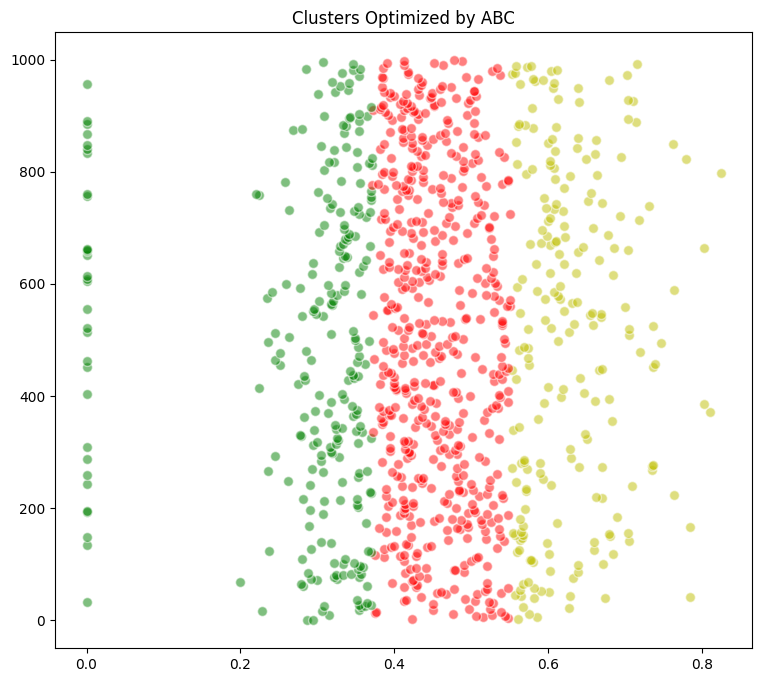

In [259]:
colors = ['r', 'g', 'y']
plt.figure(figsize=(9,8))
count = 0
for instance, tgt in zip(new_tfidf_jobid, custom_tgt):
    plt.scatter(instance, count, s=50, edgecolor='w', alpha=0.5, color=colors[tgt])
    count+=1
# for centroid in centroids:
#     plt.scatter(centroids[centroid][0], centroids[centroid][1],
#                 color='k', marker='x', lw=5, s=500)
plt.title('Clusters Optimized by ABC')

In [267]:
# objective_function = SumOfSquaredErrors(dim=3, n_clusters=3, data=new_tfidf_jobid)
# objective_function.evaluate(np.array([[0.43456222],[0.30653669],[0.66890304]]))


Text(0.5, 0, 'Iteration')

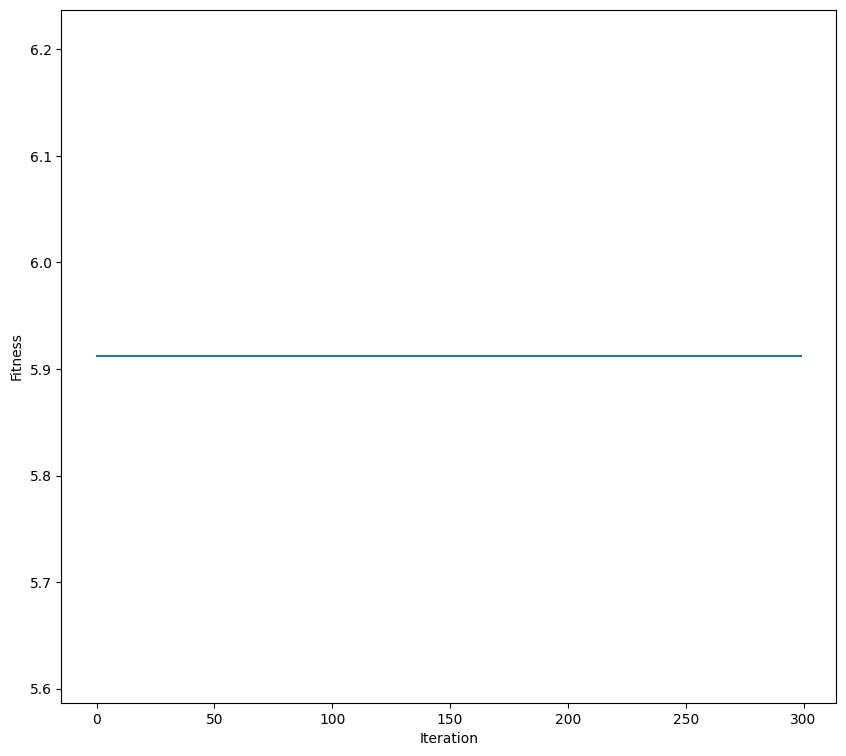

In [268]:
itr = range(len(optimizer.optimality_tracking))
val = optimizer.optimality_tracking
plt.figure(figsize=(10, 9))
plt.plot(itr, val)
plt.ylabel('Fitness')
plt.xlabel('Iteration')

In [171]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [172]:
def frequencies_dict(cluster_index):
    if cluster_index > true_k - 1:
        return
    term_frequencies = km.cluster_centers_[cluster_index]
    sorted_terms = centroids[cluster_index]
    frequencies = {terms[i]: term_frequencies[i] for i in sorted_terms}
    return frequencies

In [173]:
def makeImage(frequencies):

    wc = WordCloud(background_color="white", max_words=50)
    # generate word cloud
    wc.generate_from_frequencies(frequencies)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

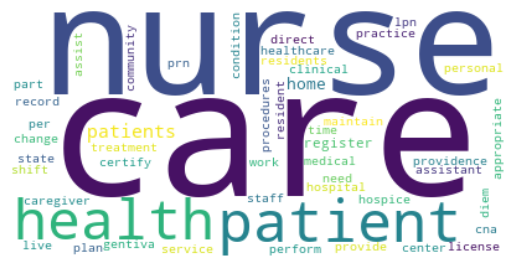

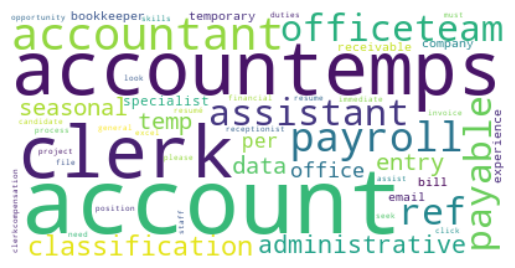

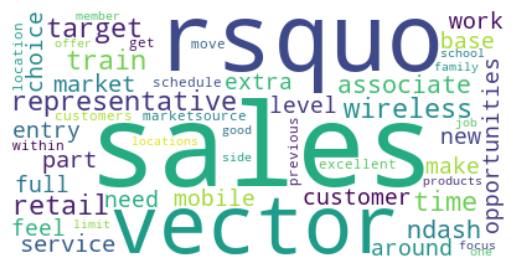

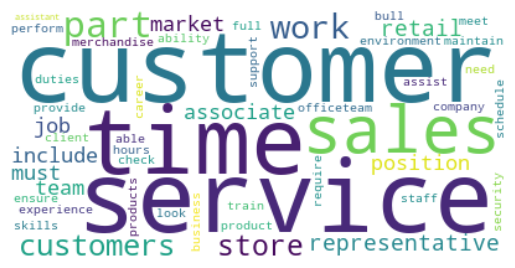

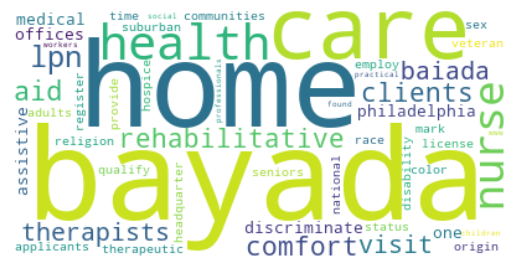

In [174]:
for i in range(true_k):
    freq = frequencies_dict(i)
    makeImage(freq)
    print()

# Cretating the User Corpus
Let's Take the dataset called job views.

In [148]:
df_job_view = pd.read_csv("C:/Users/Srushti/Desktop/capstone/Job_Views.csv")
df_job_view.head(2)


,Applicant.ID,Job.ID,Title,Position,Company,City,State.Name,State.Code,Industry,View.Start,View.End,View.Duration,Created.At,Updated.At
0,10000,73666,Cashiers & Valets Needed! @ WallyPark,Cashiers & Valets Needed!,WallyPark,Newark,New Jersey,NJ,NaN,2014-12-12 20:12:35 UTC,2014-12-12 20:31:24 UTC,1129.0,2014-12-12 20:12:35 UTC,2014-12-12 20:12:35 UTC
1,10000,96655,Macy's Seasonal Retail Fragrance Cashier - Ga...,Macy's Seasonal Retail Fragrance Cashier - Ga...,Macy's,Garden City,New York,NY,NaN,2014-12-12 20:08:50 UTC,2014-12-12 20:10:15 UTC,84.0,2014-12-12 20:08:50 UTC,2014-12-12 20:08:50 UTC


In this case we will use only the columns 'Applicant.ID', 'Job.ID', 'Position', 'Company','City'

In [149]:

df_job_view = df_job_view[['Applicant.ID', 'Job.ID', 'Position', 'Company','City']]
df_job_view["select_pos_com_city"] = df_job_view["Position"].map(str) + "  " + df_job_view["Company"] +"  "+ df_job_view["City"]
df_job_view['select_pos_com_city'] = df_job_view['select_pos_com_city'].map(str).apply(clean_txt)
df_job_view['select_pos_com_city'] = df_job_view['select_pos_com_city'].str.lower()
df_job_view = df_job_view[['Applicant.ID','select_pos_com_city']]
df_job_view.head()


,Applicant.ID,select_pos_com_city
0,10000,cashier valet need wallypark newark
1,10000,macys seasonal retail fragrance cashier garden...
2,10001,part time showroom sales cashier grizzly indus...
3,10002,event specialist part time advantage sales mar...
4,10002,bonefish kitchen staff bonefish grill greenville


### Experience Dataset


In [150]:
#Experience
df_experience = pd.read_csv("C:/Users/Srushti/Desktop/capstone/Experience.csv")
df_experience.head(2)

,Applicant.ID,Position.Name,Employer.Name,City,State.Name,State.Code,Start.Date,End.Date,Job.Description,Salary,Can.Contact.Employer,Created.At,Updated.At
0,10001,Account Manager / Sales Administration / Quali...,Barcode Resourcing,Bellingham,Washington,WA,2012-10-15,NaN,NaN,NaN,NaN,2014-12-12 20:10:02 UTC,2014-12-12 20:10:02 UTC
1,10001,Electronics Technician / Item Master Controller,Ryzex Group,Bellingham,Washington,WA,2001-12-01,2012-04-01,NaN,NaN,NaN,2014-12-12 20:10:02 UTC,2014-12-12 20:10:02 UTC


In [151]:
#taking only Position
df_experience= df_experience[['Applicant.ID','Position.Name']]
#cleaning the text
df_experience['Position.Name'] = df_experience['Position.Name'].map(str).apply(clean_txt)
df_experience.head()


,Applicant.ID,Position.Name
0,10001,account manager sales administration quality a...
1,10001,electronics technician item master controller
2,10001,machine operator
3,10003,maintenance technician
4,10003,electrical helper


In [152]:
df_experience =  df_experience.sort_values(by='Applicant.ID')
df_experience = df_experience.fillna(" ")
df_experience.head()


,Applicant.ID,Position.Name
2763,2,volunteer
2762,2,writer uloop blog
3759,3,market intern
3758,3,server
3757,3,prep cook


same applicant has 3 applications 100001 in sigle line so we need to join them

In [153]:
#adding same rows to a single row
df_experience = df_experience.groupby('Applicant.ID', sort=False)['Position.Name'].apply(' '.join).reset_index()
df_experience.head(5)

,Applicant.ID,Position.Name
0,2,volunteer writer uloop blog
1,3,market intern server prep cook
2,6,project assistant
3,8,deli clerk server cashier food prep order taker
4,11,cashier


### Position of Interest dataset

In [154]:
#Position of interest
df_poi =  pd.read_csv("C:/Users/Srushti/Desktop/capstone/Positions_Of_Interest.csv", sep=',')
df_poi = df_poi.sort_values(by='Applicant.ID')
df_poi.head()

,Applicant.ID,Position.Of.Interest,Created.At,Updated.At
6437,96,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
1156,153,Barista,2014-08-14 15:56:43 UTC,2015-02-18 02:35:06 UTC
1155,153,Host,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
1154,153,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
1158,153,Sales Rep,2014-08-14 15:56:47 UTC,2015-03-02 02:13:08 UTC


In [155]:
df_poi = df_poi.drop('Updated.At', 1)
df_poi = df_poi.drop('Created.At', 1)

#cleaning the text
df_poi['Position.Of.Interest']=df_poi['Position.Of.Interest'].map(str).apply(clean_txt)
df_poi = df_poi.fillna(" ")
df_poi.head(10)

C:\Users\Srushti\AppData\Local\Temp\ipykernel_14948\1792386838.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_poi = df_poi.drop('Updated.At', 1)
C:\Users\Srushti\AppData\Local\Temp\ipykernel_14948\1792386838.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_poi = df_poi.drop('Created.At', 1)


,Applicant.ID,Position.Of.Interest
6437,96,server
1156,153,barista
1155,153,host
1154,153,server
1158,153,sales rep
1157,153,customer service rep
1952,256,host
1957,256,production area
1956,256,sales rep
1955,256,customer service rep


In [156]:
df_poi = df_poi.groupby('Applicant.ID', sort=True)['Position.Of.Interest'].apply(' '.join).reset_index()
df_poi.head()

,Applicant.ID,Position.Of.Interest
0,96,server
1,153,barista host server sales rep customer service...
2,256,host production area sales rep customer servic...
3,438,customer service rep barista host server
4,568,receptionist customer service rep book keeper


## Creating the final user dataset by merging all the users datasets

Merging jobs and experience dataframes

In [157]:

df_jobs_exp = df_job_view.merge(df_experience, left_on='Applicant.ID', right_on='Applicant.ID', how='outer')
df_jobs_exp = df_jobs_exp.fillna(' ')
df_jobs_exp = df_jobs_exp.sort_values(by='Applicant.ID')
df_jobs_exp.head()

,Applicant.ID,select_pos_com_city,Position.Name
12370,2,,volunteer writer uloop blog
12371,3,,market intern server prep cook
12372,6,,project assistant
12373,8,,deli clerk server cashier food prep order taker
12374,11,,cashier


Merging position of interest with existing dataframe

In [158]:

df_jobs_exp_poi = df_jobs_exp.merge(df_poi, left_on='Applicant.ID', right_on='Applicant.ID', how='outer')
df_jobs_exp_poi = df_jobs_exp_poi.fillna(' ')
df_jobs_exp_poi = df_jobs_exp_poi.sort_values(by='Applicant.ID')
df_jobs_exp_poi.head()

,Applicant.ID,select_pos_com_city,Position.Name,Position.Of.Interest
0,2,,volunteer writer uloop blog,
1,3,,market intern server prep cook,
2,6,,project assistant,
3,8,,deli clerk server cashier food prep order taker,
4,11,,cashier,


combining all the columns

In [159]:
df_jobs_exp_poi["text"] = df_jobs_exp_poi["select_pos_com_city"].map(str) + df_jobs_exp_poi["Position.Name"] +" "+ df_jobs_exp_poi["Position.Of.Interest"]

df_jobs_exp_poi.head()

,Applicant.ID,select_pos_com_city,Position.Name,Position.Of.Interest,text
0,2,,volunteer writer uloop blog,,volunteer writer uloop blog
1,3,,market intern server prep cook,,market intern server prep cook
2,6,,project assistant,,project assistant
3,8,,deli clerk server cashier food prep order taker,,deli clerk server cashier food prep order tak...
4,11,,cashier,,cashier


Select only "Applicant.ID" and "text" columns:

In [160]:
df_final_person= df_jobs_exp_poi[['Applicant.ID','text']]
df_final_person.head()

,Applicant.ID,text
0,2,volunteer writer uloop blog
1,3,market intern server prep cook
2,6,project assistant
3,8,deli clerk server cashier food prep order tak...
4,11,cashier


In [161]:
df_final_person.columns = ['Applicant_id','text']
df_final_person.head()

,Applicant_id,text
0,2,volunteer writer uloop blog
1,3,market intern server prep cook
2,6,project assistant
3,8,deli clerk server cashier food prep order tak...
4,11,cashier


In [162]:
df_final_person['text'] = df_final_person['text'].apply(clean_txt)
df_final_person.head()


C:\Users\Srushti\AppData\Local\Temp\ipykernel_14948\4089577716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_person['text'] = df_final_person['text'].apply(clean_txt)


,Applicant_id,text
0,2,volunteer writer uloop blog
1,3,market intern server prep cook
2,6,project assistant
3,8,deli clerk server cashier food prep order taker
4,11,cashier


### For test the recommender we select the user  which ID is 326

In [163]:
u = 326
index = np.where(df_final_person['Applicant_id'] == u)[0][0]
user_q = df_final_person.iloc[[index]]
user_q

,Applicant_id,text
186,326,java developer


## The recommender systems


#### Computing cosine similarity using tfidf

In [298]:

from sklearn.metrics.pairwise import cosine_similarity
user_tfidf = tfidf_vectorizer.transform(user_q['text'])


user_tfidf = user_tfidf.toarray()
user_tfidf = [[max(user_tfidf[0])]]
print(user_tfidf)

[[1.0]]


In [285]:
# for i in centroids.values()


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [303]:
cos_similarity_tfidf = map(lambda x: cosine_similarity(user_tfidf, x),[new_tfidf_jobid])

In [165]:
print(user_tfidf)


  (0, 1913)	1.0


In [304]:
output2 = list(cos_similarity_tfidf)

In [310]:
print(output2)

[array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,

In [311]:
print(output2[0])

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

In [314]:
print(output2[0][0])
op3 = output2[0][0]

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

###  Function to get the top-N recomendations order by score

In [305]:

def get_recommendation(top, df_all, scores):
  recommendation = pd.DataFrame(columns = ['ApplicantID', 'JobID',  'title', 'score'])
  count = 0
  for i in top:
      recommendation.at[count, 'ApplicantID'] = u
      recommendation.at[count, 'JobID'] = df_all['Job.ID'][i]
      recommendation.at[count, 'title'] = df_all['Title'][i]
      recommendation.at[count, 'score'] =  scores[count]
      count += 1
  return recommendation

## The top recommendations using TF-IDF

In [318]:
top = sorted(range(len(op3)), key=lambda i: op3[i], reverse=True)[:10]
print(top)
list_scores = [output2[i][0][0] for i in top]
get_recommendation(top,df_all, list_scores)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


IndexError: list index out of range

### Using Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

count_jobid = count_vectorizer.fit_transform((df_all['text'])) #fitting and transforming the vector
count_jobid

<84090x50754 sparse matrix of type '<class 'numpy.int64'>'
	with 8263698 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
user_count = count_vectorizer.transform(user_q['text'])
cos_similarity_countv = map(lambda x: cosine_similarity(user_count, x),count_jobid)


In [ ]:
output2 = list(cos_similarity_countv)

## The top recommendations using CountVectorizer

In [ ]:
top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:10]
list_scores = [output2[i][0][0] for i in top]
get_recommendation(top, df_all, list_scores)

,ApplicantID,JobID,title,score
0,326,303112,Java Developer @ TransHire,0.635001
1,326,294684,Java Developer @ Kavaliro,0.600245
2,326,269922,Entry Level Java Developer / Jr. Java Develope...,0.571726
3,326,141831,Lead Java/J2EE Developer - Contract to Hire @ ...,0.496907
4,326,270171,Senior Java Developer - Contract to Hire - Gre...,0.481757
5,326,309945,"Java Software Engineer @ iTech Solutions, Inc.",0.454673
6,326,305264,Sr. Java Developer @ Paladin Consulting Inc,0.406017
7,326,245753,Java Administrator @ ConsultNet,0.378968
8,326,150882,Java Consultant - Mobile Apps Development @ Co...,0.363216
9,326,146640,Jr. Java Developer @ Paladin Consulting Inc,0.323381
